<a href="https://colab.research.google.com/github/ber-pro/MIAT/blob/main/MIAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузка данных


In [52]:
!git clone https://github.com/ber-pro/MIAT.git

fatal: destination path 'MIAT' already exists and is not an empty directory.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [54]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [55]:
df = pd.read_excel('/content/MIAT/EsseEthnetic - первичные данные.xlsx')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 47 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   №                                               820 non-null    int64  
 1   Этническая принадлежность                       820 non-null    int64  
 2   возраст                                         820 non-null    int64  
 3   возрастная группа                               820 non-null    int64  
 4   пол                                             820 non-null    int64  
 5   курение                                         820 non-null    int64  
 6   рост                                            820 non-null    float64
 7   вес                                             820 non-null    float64
 8   ИМТ                                             820 non-null    float64
 9   объем талии                                

## Постановка задачи


1. Прогнозирование попадания человека в группу риска сердечно-сосудистыми заболеваниями на основе амбулаторных анализов.
2. Определение возрастной группы на основе амбулаторных анализов.
3. Диагностика сахарного диабета.
4. Определение наличия проблем с сосудами




##Определение наличия проблем с сосудами





##**Предварительная обработка**

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 47 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   №                                               820 non-null    int64  
 1   Этническая принадлежность                       820 non-null    int64  
 2   возраст                                         820 non-null    int64  
 3   возрастная группа                               820 non-null    int64  
 4   пол                                             820 non-null    int64  
 5   курение                                         820 non-null    int64  
 6   рост                                            820 non-null    float64
 7   вес                                             820 non-null    float64
 8   ИМТ                                             820 non-null    float64
 9   объем талии                                

In [58]:
df.columns

Index(['№', 'Этническая принадлежность', 'возраст', 'возрастная группа', 'пол',
       'курение', 'рост', 'вес', 'ИМТ', 'объем талии', 'Ожирение',
       'систоличепская артериальная гипертензия ',
       'степень систолической артериальной гипертензии', 'САД',
       'диастолическая артериальная гипертензия ', 'ДАД', 'ЧСС', 'ГХС', 'ОХС',
       'ЛПНП', 'Гипоальфахолестеринемия', 'ЛПВП', 'ХС не-ЛПВП',
       'гипертриглицеридемия', 'ТГ', 'ГиперЛП(а)', 'ЛП(а)', 'апоА', 'апоВ',
       'глюкоза', 'креатинин', 'СКФ', 'Гиперурикемия', 'мочевая кислота',
       'CRP', 'SCORE', 'категория риска по SCORE', 'SCORE2',
       'категория риска по SCORE2', 'наличие УЗ диагностики',
       'наличие атеросклероза', 'количество АСБ',
       'суммарный процент стеноза АСБ', 'средний стеноз', 'ДДЛЖ',
       'Наличие STRAIN', 'глобал сокр'],
      dtype='object')

In [59]:
df.drop(["№", "мочевая кислота", "гипертриглицеридемия", "Ожирение","возрастная группа", "систоличепская артериальная гипертензия ", "степень систолической артериальной гипертензии", "диастолическая артериальная гипертензия ", "диастолическая артериальная гипертензия ", "Гипоальфахолестеринемия", "ХС не-ЛПВП", "ТГ", "ГиперЛП(а)", "ЛП(а)", "апоА", "апоВ", "креатинин", "СКФ", "Гиперурикемия", "количество АСБ", "суммарный процент стеноза АСБ", "средний стеноз", "ДДЛЖ", "глобал сокр"], axis=1, inplace=True)

In [60]:
df.drop(["SCORE", "категория риска по SCORE", "SCORE2", "категория риска по SCORE2",  "наличие атеросклероза", "Наличие STRAIN"],axis=1, inplace=True)

Выберем только те столбцы, которые представляют интерес в контексте сосудистых заболеваний или могут служить потенциальными предикторами:

1. Этническая принадлежность
2. Возраст
4. Пол
5. Курение
6. Рост
7. Вес
8. ИМТ (индекс массы тела)
9. Объем талии

11. Систолическое артериальное давление (САД): Давление в артериях в момент сердечных сокращений. Высокое значение может указывать на гипертензию.

12. Диастолическое артериальное давление (ДАД): Давление в артериях между сердечными сокращениями. Также важный показатель для оценки артериального давления.

13. ЧСС (частота сердечных сокращений): Количество ударов сердца в минуту, что может быть важным при оценке сердечного здоровья.

14. ГХС (гемоглобин в крови): Уровень гемоглобина в крови, который может быть связан с анемией или другими состояниями.

15. ОХС (общий холестерин в крови): Общее количество холестерина в крови, что важно для оценки риска атеросклероза и других сосудистых проблем.

16. ЛПНП (липопротеины низкой плотности): Известные как "плохой" холестерин, который может быть связан с образованием атеросклеротических бляшек.

18. ЛПВП (липопротеины высокой плотности): Известные как "хороший" холестерин, который может защищать от атеросклероза.

20. Глюкоза: Уровень глюкозы в крови, что может быть связано с риском диабета и сосудистых заболеваний.

21. CRP (С-реактивный белок): Показатель воспаления, который может быть связан с риском сердечно-сосудистых заболеваний.


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Этническая принадлежность  820 non-null    int64  
 1   возраст                    820 non-null    int64  
 2   пол                        820 non-null    int64  
 3   курение                    820 non-null    int64  
 4   рост                       820 non-null    float64
 5   вес                        820 non-null    float64
 6   ИМТ                        820 non-null    float64
 7   объем талии                820 non-null    float64
 8   САД                        820 non-null    int64  
 9   ДАД                        820 non-null    int64  
 10  ЧСС                        820 non-null    int64  
 11  ГХС                        820 non-null    int64  
 12  ОХС                        820 non-null    float64
 13  ЛПНП                       820 non-null    float64

Пересчитаем индекс массы тела

In [62]:
df['ИМТ'] = df['вес'] / ((df['рост']/100) ** 2)

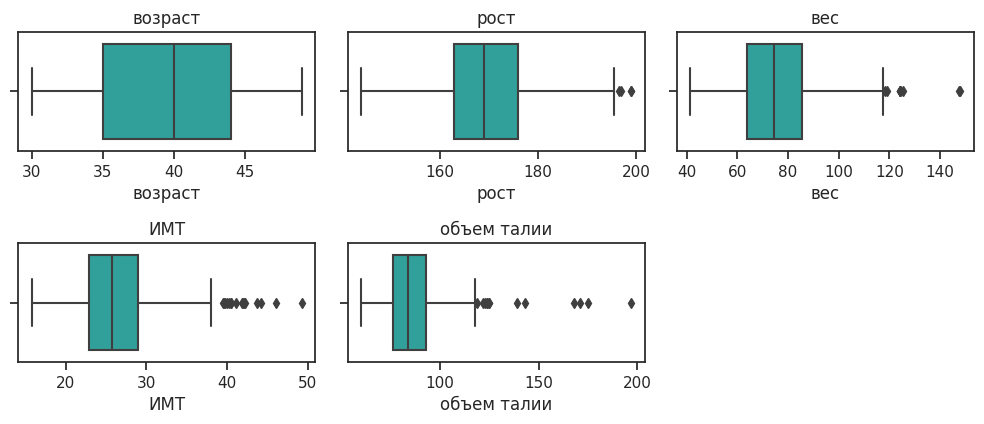

In [63]:
columns = ["возраст", "рост", "вес", "ИМТ", "объем талии"]
plt.figure(figsize=(10, 6))
for index, column in enumerate(columns, 1):
  plt.subplot(3, 3, index)
  sns.boxplot(x=df[column], color='lightseagreen')
  plt.title(column)
  plt.tight_layout()
plt.show()

Переменные имеющие выборосы требует деттального узучения, чтобы определить, являются они ошибочными или отражают реальные измерения.

Возраст - не имеет выбросов, все значения находяться в пределах ожидаемого диапозона.

Рост и вес: выбросы этих переменных имеют место быть, но требуется исследования в связки друг с другом.

Индекс массы тела (ИМТ) выше 40 считается "очень тяжелым ожирением". Несколько выбросов в данных достигают значений более 45, что, возможно, редко встречается, но не исключено. Однако стоит отметить, что такие высокие значения ИМТ могут быть действительными и не обязательно свидетельствовать о наличии ошибок в данных.

Объем талии: имеет явные выбросы. Значения до 150 имеют место быть, но больше явный признак ошибок в данных.

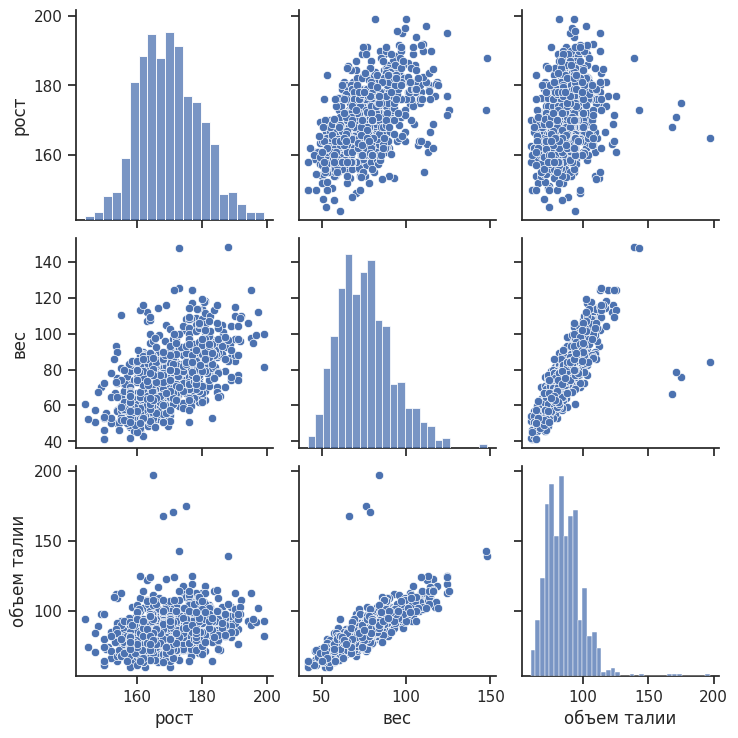

In [64]:
df1 = df[['рост', 'вес', 'объем талии']]
sns.set(style='ticks')
sns.pairplot(df1, diag_kind='hist')
plt.show()

In [65]:
df2 = df[df['объем талии'] > 150]
df = df[df['объем талии'] < 150]
df2

,Этническая принадлежность,возраст,пол,курение,рост,вес,ИМТ,объем талии,САД,ДАД,ЧСС,ГХС,ОХС,ЛПНП,ЛПВП,глюкоза,CRP,наличие УЗ диагностики
342,0,46,1,3,175.0,75.9,24.783673,175.0,124,76,73,1,5.40,2.87,1.38,4.70,15.10,0
368,0,34,2,1,165.0,84.0,30.853994,197.0,126,77,69,1,5.87,4.41,1.13,5.74,0.50,0
709,0,48,2,1,171.0,78.6,26.880066,171.0,149,92,77,0,5.12,2.47,2.01,4.58,0.35,0
713,0,38,1,1,168.1,66.3,23.462706,168.1,150,92,73,1,6.34,4.36,1.67,5.27,4.48,0


Заметим, что в данном случае рост и объем талии равны

In [66]:
from sklearn.linear_model import LinearRegression

X = df[["пол", "вес", "рост"]]
Y = df["объем талии"]

model = LinearRegression()
model.fit(X, Y)
index = [342, 368, 709, 713]
df_tmp = df2[["пол", "вес", "рост"]]
for i in range(len(df2)):
  new_data = model.predict([df_tmp.iloc[i]])
  df2.at[index[i], 'объем талии'] = round(new_data[0],1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [67]:
df2

,Этническая принадлежность,возраст,пол,курение,рост,вес,ИМТ,объем талии,САД,ДАД,ЧСС,ГХС,ОХС,ЛПНП,ЛПВП,глюкоза,CRP,наличие УЗ диагностики
342,0,46,1,3,175.0,75.9,24.783673,85.0,124,76,73,1,5.40,2.87,1.38,4.70,15.10,0
368,0,34,2,1,165.0,84.0,30.853994,92.2,126,77,69,1,5.87,4.41,1.13,5.74,0.50,0
709,0,48,2,1,171.0,78.6,26.880066,85.7,149,92,77,0,5.12,2.47,2.01,4.58,0.35,0
713,0,38,1,1,168.1,66.3,23.462706,80.2,150,92,73,1,6.34,4.36,1.67,5.27,4.48,0


In [68]:
df = pd.concat([df, df2], ignore_index=True)

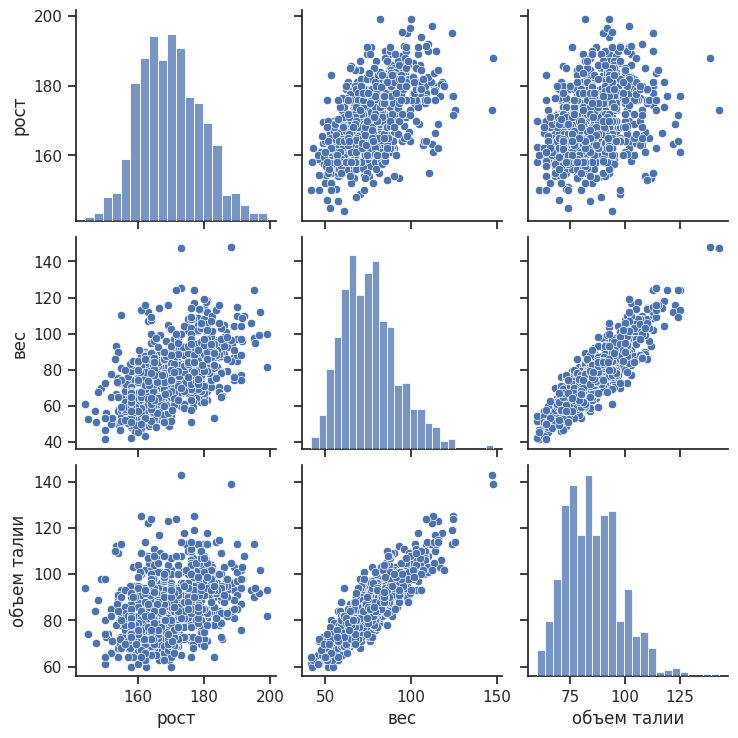

In [69]:
df1 = df[['рост', 'вес', 'объем талии']]
sns.set(style='ticks')
sns.pairplot(df1, diag_kind='hist')
plt.show()

In [70]:
df[df["объем талии"] > 125]

,Этническая принадлежность,возраст,пол,курение,рост,вес,ИМТ,объем талии,САД,ДАД,ЧСС,ГХС,ОХС,ЛПНП,ЛПВП,глюкоза,CRP,наличие УЗ диагностики
491,0,48,1,3,188.0,148.0,41.874151,139.0,131,81,70,0,3.73,2.05,1.35,4.98,0.16,1
646,0,45,2,1,173.0,147.4,49.249891,143.0,141,87,73,0,4.55,2.98,1.34,4.49,0.69,0


In [71]:
df[df["ИМТ"] > 40]

,Этническая принадлежность,возраст,пол,курение,рост,вес,ИМТ,объем талии,САД,ДАД,ЧСС,ГХС,ОХС,ЛПНП,ЛПВП,глюкоза,CRP,наличие УЗ диагностики
174,0,41,1,1,169.0,115.7,40.509786,123.0,117,71,82,1,5.35,3.47,1.67,4.60,2.79,0
244,0,34,2,1,163.2,112.2,42.126225,122.0,121,73,65,0,4.77,2.70,1.58,5.39,0.21,0
290,0,41,2,3,163.0,106.8,40.197222,108.0,122,74,68,1,5.35,3.53,1.28,5.02,6.39,1
397,0,30,2,3,166.5,114.0,41.122203,117.0,128,78,66,0,4.15,2.72,1.24,6.18,0.49,0
454,0,39,2,3,164.0,107.6,40.005949,100.0,130,80,68,0,4.77,3.28,1.17,7.54,12.98,0
456,0,40,2,1,155.0,110.5,45.993757,113.0,130,80,68,0,5.15,3.22,1.19,4.94,17.49,0
491,0,48,1,3,188.0,148.0,41.874151,139.0,131,81,70,0,3.73,2.05,1.35,4.98,0.16,1
592,0,41,2,1,173.0,125.5,41.932574,114.0,137,84,72,1,7.06,2.47,0.96,5.34,2.28,0
610,0,47,2,3,161.0,113.1,43.632576,125.0,138,85,86,1,5.49,3.14,1.70,4.75,0.24,0
646,0,45,2,1,173.0,147.4,49.249891,143.0,141,87,73,0,4.55,2.98,1.34,4.49,0.69,0


Удалим столбцы "вес" "рост" из-за ненадобности

In [72]:
df.drop(['вес', 'рост'],axis=1, inplace=True)

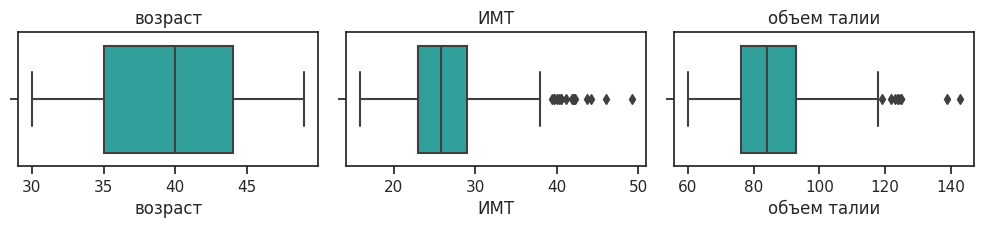

In [73]:
columns = ["возраст", "ИМТ", "объем талии"]
plt.figure(figsize=(10, 6))
for index, column in enumerate(columns, 1):
  plt.subplot(3, 3, index)
  sns.boxplot(x=df[column], color='lightseagreen')
  plt.title(column)
  plt.tight_layout()
plt.show()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Этническая принадлежность  820 non-null    int64  
 1   возраст                    820 non-null    int64  
 2   пол                        820 non-null    int64  
 3   курение                    820 non-null    int64  
 4   ИМТ                        820 non-null    float64
 5   объем талии                820 non-null    float64
 6   САД                        820 non-null    int64  
 7   ДАД                        820 non-null    int64  
 8   ЧСС                        820 non-null    int64  
 9   ГХС                        820 non-null    int64  
 10  ОХС                        820 non-null    float64
 11  ЛПНП                       820 non-null    float64
 12  ЛПВП                       820 non-null    float64
 13  глюкоза                    820 non-null    float64

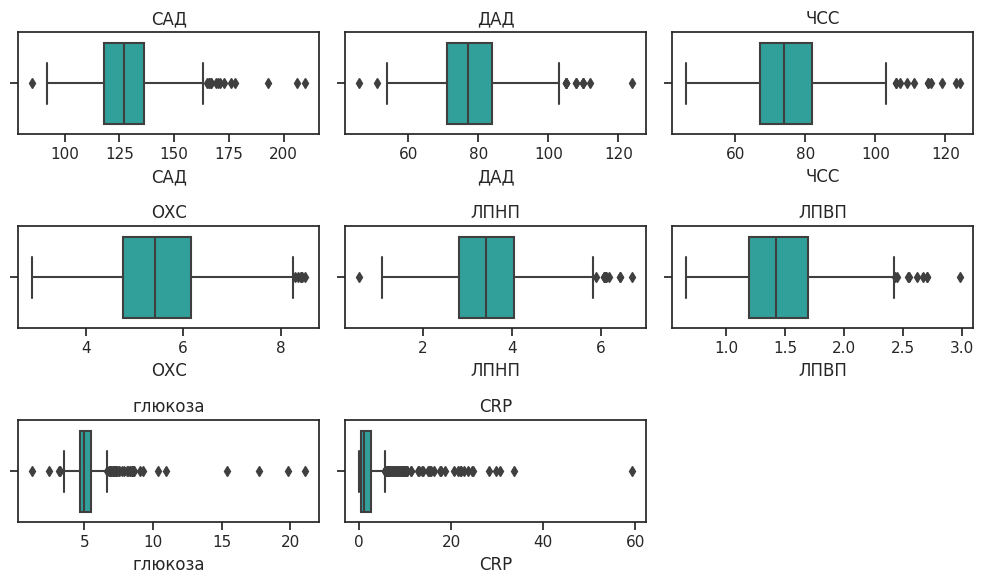

In [75]:
columns = ["САД", "ДАД", "ЧСС", "ОХС", "ЛПНП", "ЛПВП", "глюкоза", "CRP"]
plt.figure(figsize=(10, 6))
for index, column in enumerate(columns, 1):
  plt.subplot(3, 3, index)
  sns.boxplot(x=df[column], color='lightseagreen')
  plt.title(column)
  plt.tight_layout()
plt.show()

САД и ДАД: САД выше 180 мм рт. ст. и ДАД выше 120 мм рт. ст. считается
гипертензивным кризом, требующим неотложной медицинской помощи.
Несмотря на то что это редкие случаи, они возможны. Значение 85 мм рт. ст.
для САД, вероятно, является ошибкой, так как это нереалистично низкое
значение для взрослого человека.


ЧСС: для взрослых в покое считается, что нормальная ЧСС составляет примерно от 60 до 100 ударов в минуту. Значения выше 100 могут говорить о наличии тахекардии или не соблюдены правила измерений.


ОХС:  измеряется в миллимолях на литр (ммоль/л). Диапазоны:

  1. Нормальный уровень: Менее 5.2 ммоль/л

  2. Пограничный уровень: 5.2-6.2 ммоль/л

  3. Высокий уровень: 6.2 ммоль/л и выше


ЛПНП: измеряется в миллимолях на литр (ммоль/л).  Высокие показания - плохо.  Диапазоны:

  1. Низкий уровень: Менее 2.6 ммоль/л
  2. Пограничный уровень: 2.6-3.3 ммоль/л
  3. Высокий уровень: 3.4 ммоль/л и выше

ЛПВП: измеряется в миллимолях на литр (ммоль/л).  Высокие показания - хорошо. Диапазоны:  
  1. Низкий уровень: Менее 1.0 ммоль/л
  2. Средний уровень: 1.0-1.5 ммоль/л
  3. Высокий уровень: 1.6 ммоль/л и выше

Глюкоза: Уровень глюкозы в крови выше 7 ммоль/л свидетельствует о возможном нарушении уровня сахара в крови натощак. Показатели, превышающие 11 ммоль/л, могут указывать на наличие диабета. Однако, значение, превышающее 19 ммоль/л, является крайне высоким и требует дополнительного внимания. Показатели ниже 3 ммоль/л также могут быть считаться низкими и указывать на гипогликемию.

CRP: измеряетсяв миллиграммах на литр (мг/л). Диапазоны:
  1. Низкий уровень: Менее 1.0 мг/л
  2. Средний уровень: 1.0-3.0 мг/л
  3. Высокий уровень: Более 3.0 мг/л

In [76]:
df = df[df["САД"] > 90]

In [77]:
df[df["САД"] > 180]

,Этническая принадлежность,возраст,пол,курение,ИМТ,объем талии,САД,ДАД,ЧСС,ГХС,ОХС,ЛПНП,ЛПВП,глюкоза,CRP,наличие УЗ диагностики
761,0,49,2,3,30.550946,101.0,193,110,91,1,5.65,2.89,1.94,7.09,2.21,0
762,0,47,1,1,29.938272,107.0,206,110,66,1,5.40,3.99,0.93,5.64,2.45,0
763,0,42,1,3,31.139607,100.0,210,124,65,1,6.41,4.50,1.35,5.93,5.58,0


In [78]:
df[df["ЧСС"] > 110]

,Этническая принадлежность,возраст,пол,курение,ИМТ,объем талии,САД,ДАД,ЧСС,ГХС,ОХС,ЛПНП,ЛПВП,глюкоза,CRP,наличие УЗ диагностики
446,0,48,2,1,24.315886,80.0,129,80,115,0,3.98,1.95,1.47,5.47,0.36,0
483,0,43,2,3,24.977043,82.0,131,81,124,1,5.26,3.06,1.90,4.36,1.78,1
493,0,49,2,1,19.135802,69.0,131,81,119,0,4.80,3.19,1.08,5.86,1.52,0
601,0,36,2,1,21.750282,76.0,138,85,111,1,6.67,3.93,2.06,5.37,2.10,0
640,0,36,1,3,26.416327,96.0,141,87,115,1,6.59,4.89,1.13,5.09,5.79,0
656,0,42,2,1,22.605592,75.0,142,88,123,1,5.43,3.39,1.59,6.38,2.56,0
731,0,45,2,3,31.808999,108.0,155,96,116,0,5.19,3.43,1.16,5.49,3.62,0


In [79]:
df = df[df["ЛПНП"] > 1.2]

In [80]:
df[df["ЛПВП"] > 2.5]

,Этническая принадлежность,возраст,пол,курение,ИМТ,объем талии,САД,ДАД,ЧСС,ГХС,ОХС,ЛПНП,ЛПВП,глюкоза,CRP,наличие УЗ диагностики
110,0,46,2,3,24.462734,72.0,113,68,73,1,5.81,2.27,2.70,5.08,0.80,0
317,0,43,1,1,24.567474,77.0,123,75,71,1,5.94,2.61,2.70,5.45,0.23,0
409,0,38,2,3,17.524484,65.0,128,78,77,1,8.25,4.97,2.62,4.53,3.47,0
434,0,39,1,3,27.173913,94.0,129,79,86,1,6.81,3.09,2.98,4.49,9.28,0
625,0,48,2,1,26.716461,95.0,139,86,66,1,7.82,4.87,2.55,4.45,0.19,0
801,1,49,1,1,26.812219,90.0,161,89,73,1,7.46,4.18,2.54,9.30,0.50,1


In [81]:
df[df["глюкоза"] < 2.5]

,Этническая принадлежность,возраст,пол,курение,ИМТ,объем талии,САД,ДАД,ЧСС,ГХС,ОХС,ЛПНП,ЛПВП,глюкоза,CRP,наличие УЗ диагностики
4,0,45,2,1,33.090422,93.0,98,55,62,0,3.90,2.37,0.99,2.45,0.82,0
785,1,47,2,3,22.265625,76.0,113,70,67,0,4.71,2.24,1.73,1.20,0.28,1


In [82]:
df[df["глюкоза"] > 12]

,Этническая принадлежность,возраст,пол,курение,ИМТ,объем талии,САД,ДАД,ЧСС,ГХС,ОХС,ЛПНП,ЛПВП,глюкоза,CRP,наличие УЗ диагностики
410,0,38,2,3,27.584940,88.0,128,78,73,0,3.32,1.82,1.17,19.81,0.77,0
453,0,38,2,1,21.909770,76.0,130,80,97,1,8.41,3.95,1.36,21.10,1.80,0
602,0,37,1,1,24.724536,86.0,138,85,89,1,7.29,2.98,1.01,15.39,9.01,0
747,0,36,2,1,20.155361,72.0,161,101,82,0,5.15,2.19,0.66,17.72,4.90,0


In [83]:
df = df[df["глюкоза"] < 15]

In [84]:
df = df[df["CRP"] < 20]

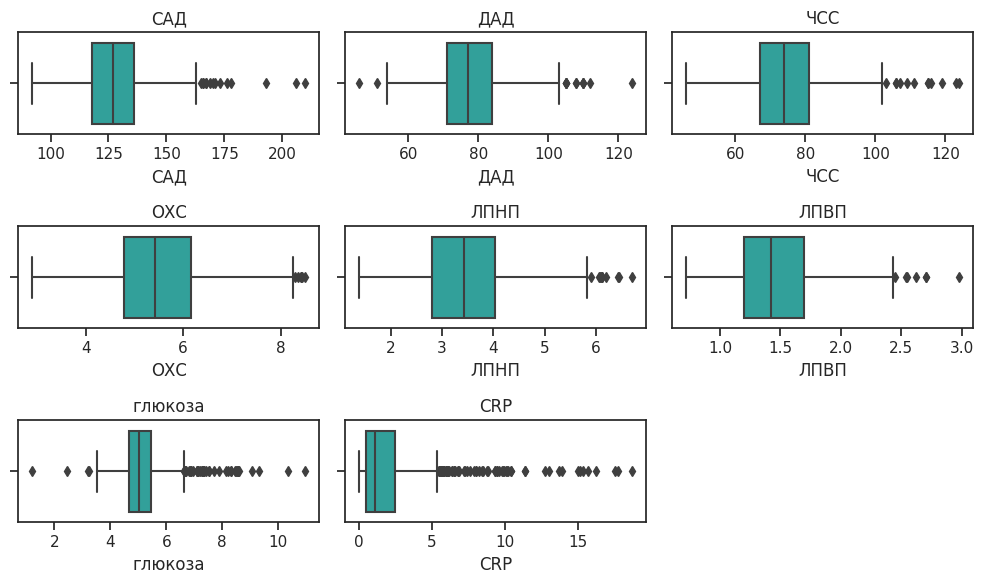

In [85]:
columns = ["САД", "ДАД", "ЧСС", "ОХС", "ЛПНП", "ЛПВП", "глюкоза", "CRP"]
plt.figure(figsize=(10, 6))
for index, column in enumerate(columns, 1):
  plt.subplot(3, 3, index)
  sns.boxplot(x=df[column], color='lightseagreen')
  plt.title(column)
  plt.tight_layout()
plt.show()

In [86]:
threshold_systolic = 140  # САД
threshold_diastolic_low = 60  # ДАД нижняя
threshold_diastolic_top = 90  # ДАД верхняя
threshold_pulse = 90  # ЧСС
threshold_ohs = 6.6  # ОХС
threshold_ldl = 5  # ЛПНП
threshold_hdl = 1  # ЛПВП
threshold_glucose = 5.71  # Глюкоза
threshold_crp = 3  # CRP

# Создадим столбец "Наличие проблем с сосудами" на основе пороговых значений
df['Наличие проблем с сосудами'] = (
    (df['САД'] > threshold_systolic) | ((df['ДАД'] > threshold_diastolic_top) | (df['ДАД'] < threshold_diastolic_low)) | (df['ЧСС'] > threshold_pulse) |
    ((df['ОХС'] > threshold_ohs) &
    (df['ЛПНП'] > threshold_ldl) &
    (df['ЛПВП'] < threshold_hdl) &
    (df['глюкоза'] > threshold_glucose)) |
    (df['CRP'] > threshold_crp)
).astype(int)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 819
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Этническая принадлежность   799 non-null    int64  
 1   возраст                     799 non-null    int64  
 2   пол                         799 non-null    int64  
 3   курение                     799 non-null    int64  
 4   ИМТ                         799 non-null    float64
 5   объем талии                 799 non-null    float64
 6   САД                         799 non-null    int64  
 7   ДАД                         799 non-null    int64  
 8   ЧСС                         799 non-null    int64  
 9   ГХС                         799 non-null    int64  
 10  ОХС                         799 non-null    float64
 11  ЛПНП                        799 non-null    float64
 12  ЛПВП                        799 non-null    float64
 13  глюкоза                     799 non

##**Статистический анализ**

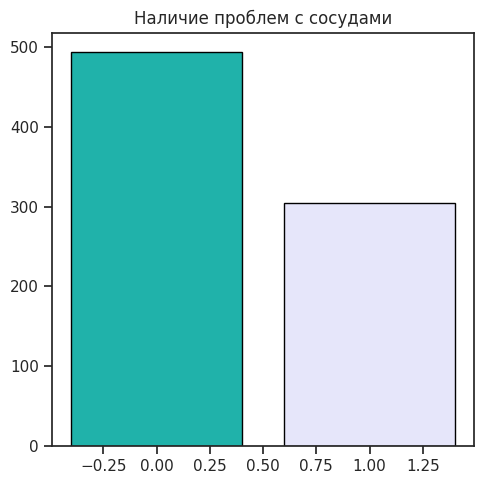

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sm_counts = df['Наличие проблем с сосудами'].value_counts()
ax.bar(sm_counts.index, sm_counts, color=['lightseagreen', 'lavender'], edgecolor='black')
ax.set_title('Наличие проблем с сосудами')

plt.tight_layout()
plt.show()

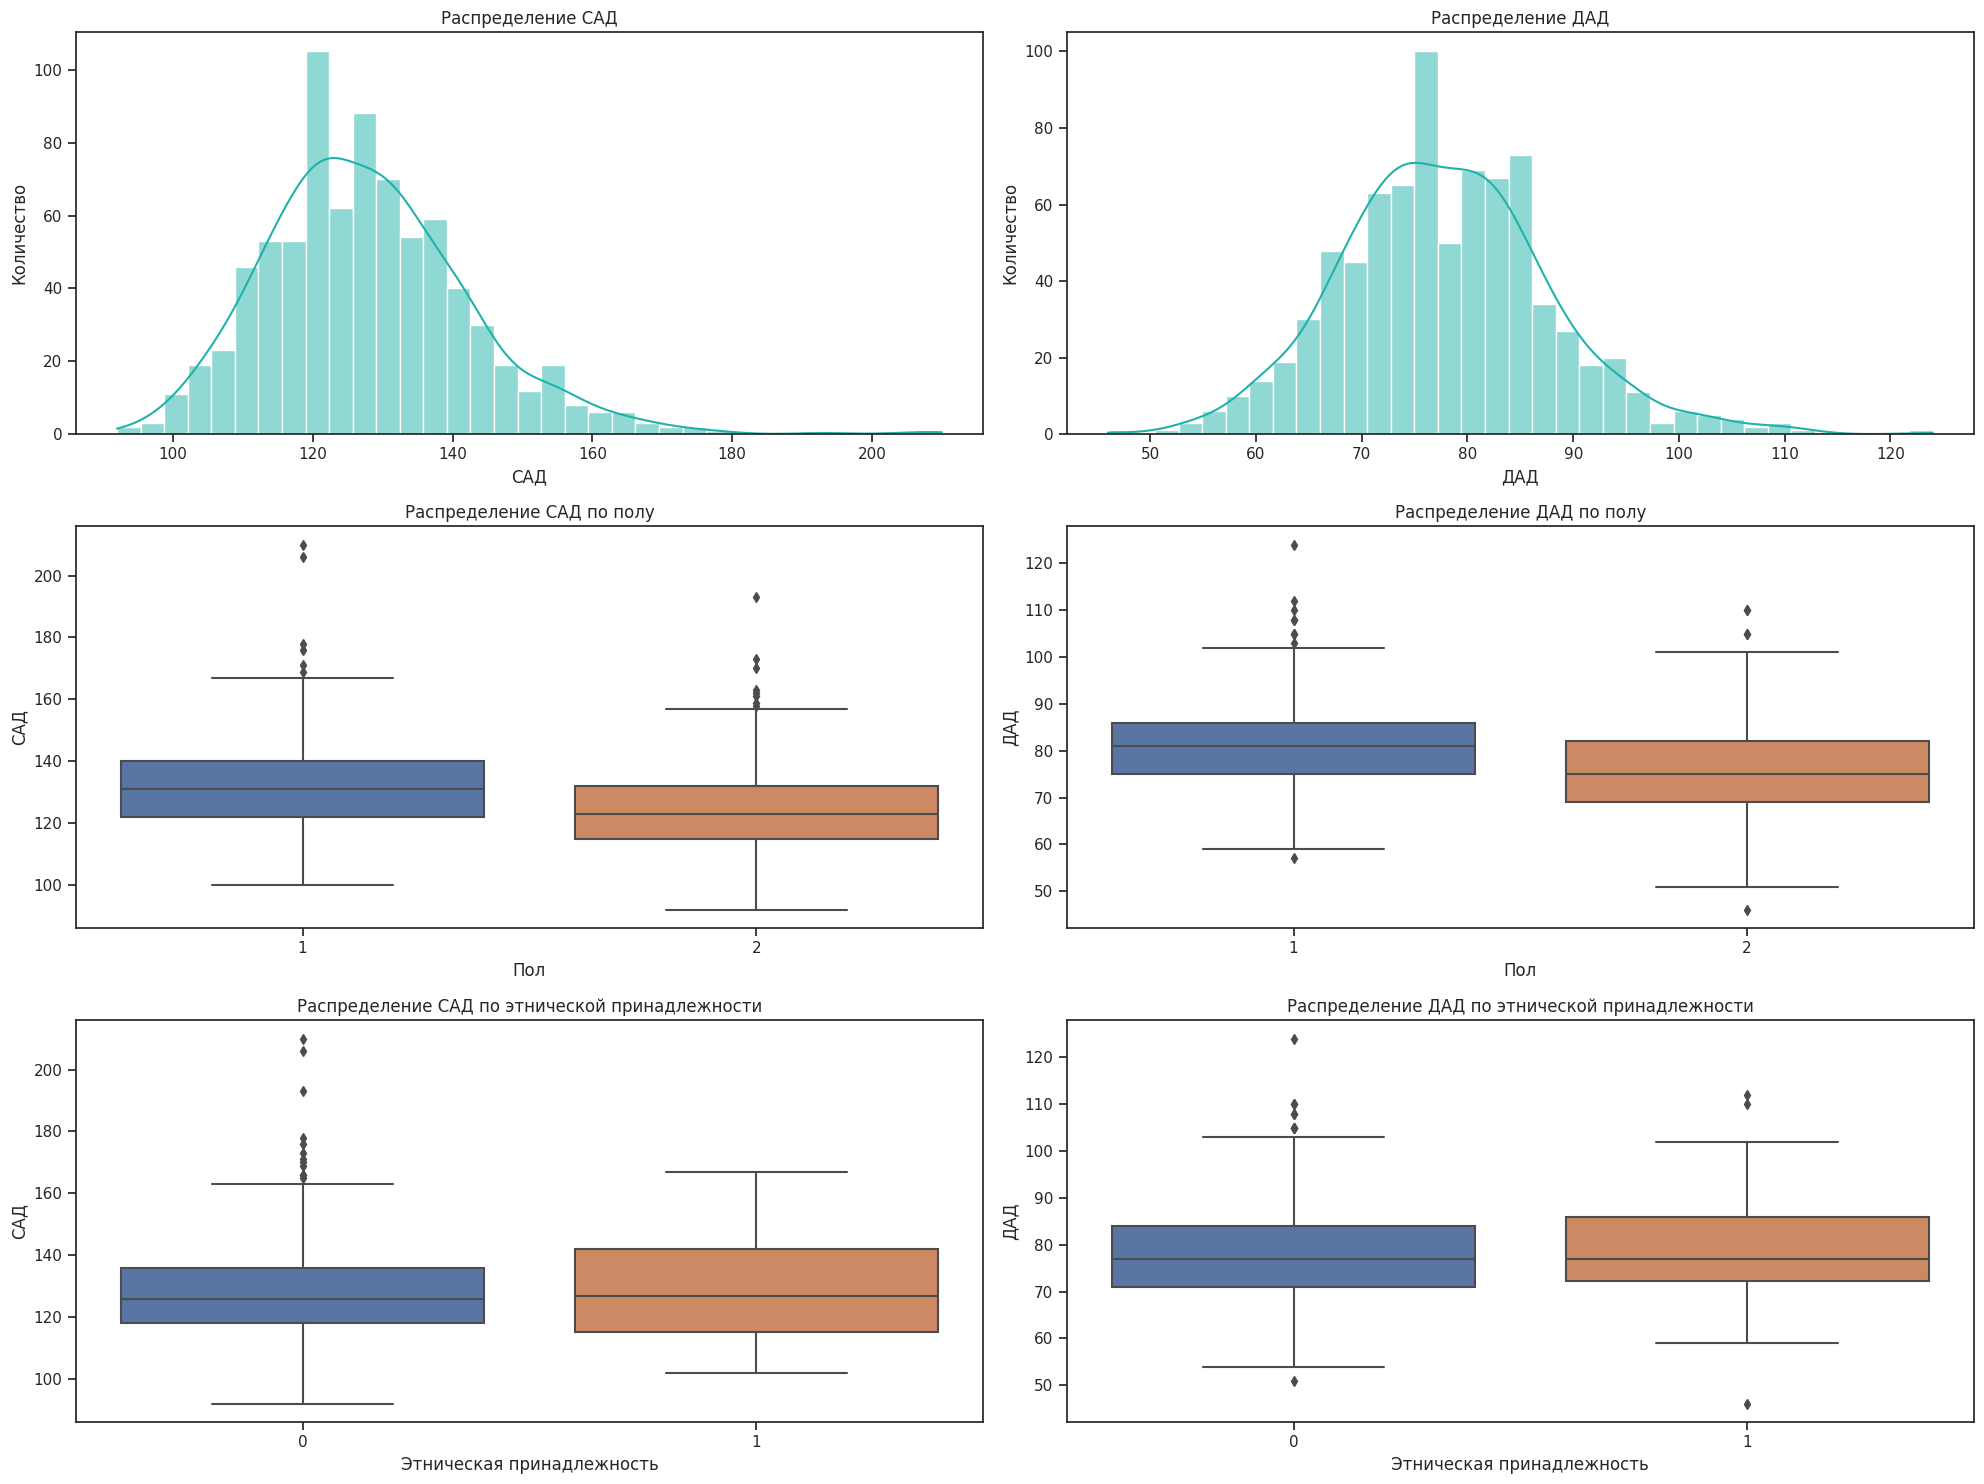

In [89]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
sns.histplot(df['САД'], kde=True, ax=ax[0, 0], bins=35, color='lightseagreen')
ax[0, 0].set_title('Распределение САД')
ax[0, 0].set_xlabel('САД')
ax[0, 0].set_ylabel('Количество')

sns.histplot(df['ДАД'], kde=True, ax=ax[0, 1], bins=35, color='lightseagreen')
ax[0, 1].set_title('Распределение ДАД')
ax[0, 1].set_xlabel('ДАД')
ax[0, 1].set_ylabel('Количество')

sns.boxplot(x=df['пол'], y=df['САД'], ax=ax[1, 0])
ax[1, 0].set_title('Распределение САД по полу')
ax[1, 0].set_xlabel('Пол')
ax[1, 0].set_ylabel('САД')

sns.boxplot(x=df['пол'], y=df['ДАД'], ax=ax[1, 1])
ax[1, 1].set_title('Распределение ДАД по полу')
ax[1, 1].set_xlabel('Пол')
ax[1, 1].set_ylabel('ДАД')

sns.boxplot(x=df['Этническая принадлежность'], y=df['САД'], ax=ax[2, 0])
ax[2, 0].set_title('Распределение САД по этнической принадлежности')
ax[2, 0].set_xlabel('Этническая принадлежность')
ax[2, 0].set_ylabel('САД')

sns.boxplot(x=df['Этническая принадлежность'], y=df['ДАД'], ax=ax[2, 1])
ax[2, 1].set_title('Распределение ДАД по этнической принадлежности')
ax[2, 1].set_xlabel('Этническая принадлежность')
ax[2, 1].set_ylabel('ДАД')

plt.tight_layout()
plt.show()

Распределение САД и ДАД: График показывает распределение двух видов давелния у пациентов. Из графиков видно, что у мужчин давление чуть выше чем у женщин. У представителей разных этносов не наблюдается различий в САД и ДАД.

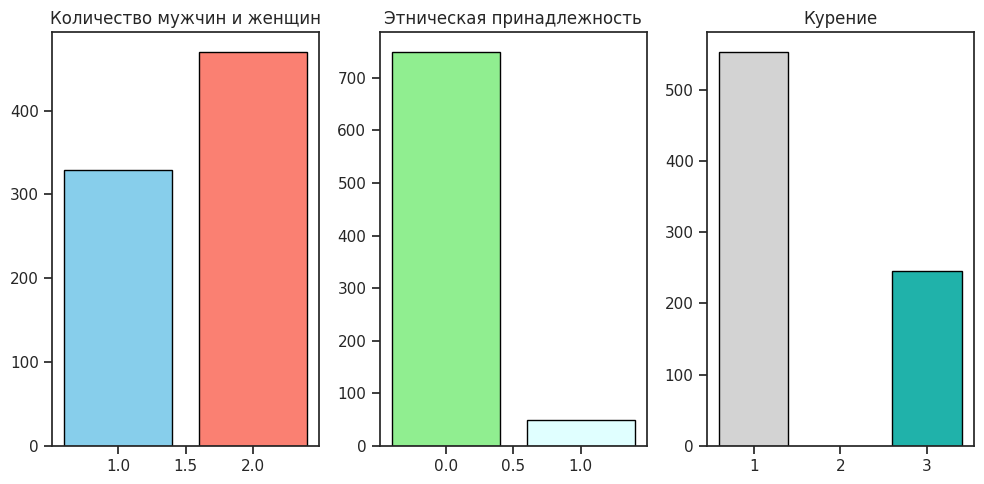

In [90]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

gender_counts = df['пол'].value_counts()
ax[0].bar(gender_counts.index, gender_counts, color=['salmon', 'skyblue'], edgecolor='black')
ax[0].set_title('Количество мужчин и женщин')

et_counts = df['Этническая принадлежность'].value_counts()
ax[1].bar(et_counts.index, et_counts, color=['lightgreen', 'lightcyan'], edgecolor='black')
ax[1].set_title('Этническая принадлежность')

sm_counts = df['курение'].value_counts()
ax[2].bar(sm_counts.index, sm_counts, color=['lightgray', 'lightseagreen', 'lavender'], edgecolor='black')
ax[2].set_title('Курение')

plt.tight_layout()
plt.show()

По соотношения мужчин и женщин, преобладают женщины.

Первая этническая группа значительно превосходит в численности вторую. Разница в размере между группами очевидна и может быть выделена на графике.

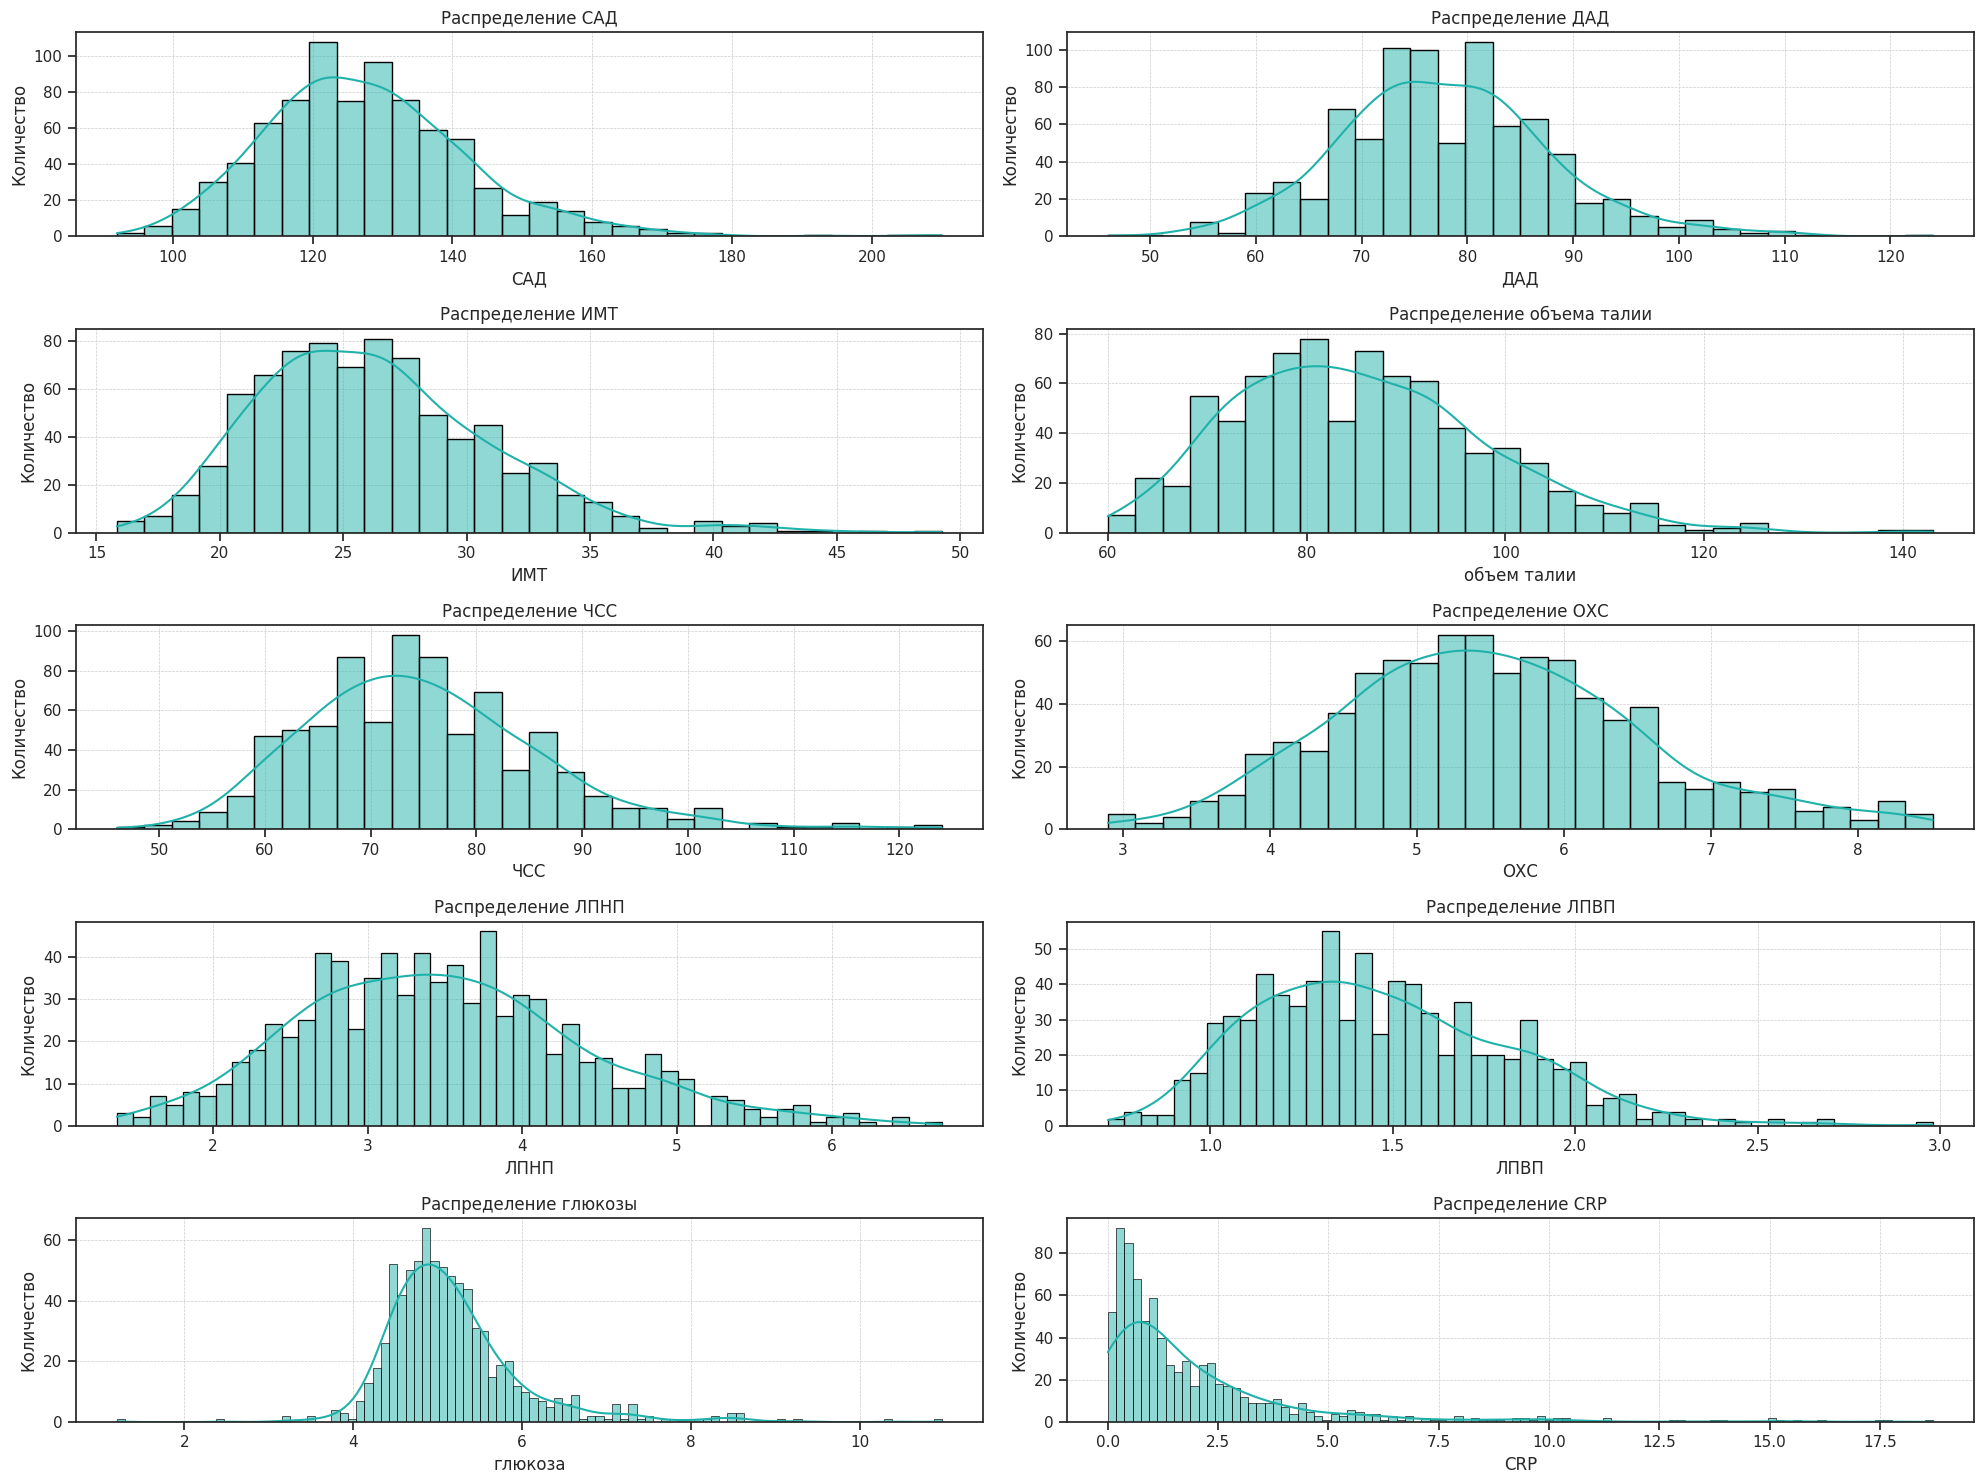

In [91]:
fig, ax = plt.subplots(5, 2, figsize=(20, 15))
sns.histplot(df['САД'], kde=True, ax=ax[0, 0], bins=30, color='lightseagreen', edgecolor='black')
ax[0, 0].set_title('Распределение САД')
ax[0, 0].set_xlabel('САД')
ax[0, 0].set_ylabel('Количество')
ax[0, 0].grid(True, linestyle='--', linewidth=0.5)

sns.histplot(df['ДАД'], kde=True, ax=ax[0, 1], bins=30, color='lightseagreen', edgecolor='black')
ax[0, 1].set_title('Распределение ДАД')
ax[0, 1].set_xlabel('ДАД')
ax[0, 1].set_ylabel('Количество')
ax[0, 1].grid(True, linestyle='--', linewidth=0.5)

sns.histplot(df['ИМТ'], kde=True, ax=ax[1, 0], bins=30, color='lightseagreen', edgecolor='black')
ax[1, 0].set_title('Распределение ИМТ')
ax[1, 0].set_xlabel('ИМТ')
ax[1, 0].set_ylabel('Количество')
ax[1, 0].grid(True, linestyle='--', linewidth=0.5)

sns.histplot(df['объем талии'], kde=True, ax=ax[1, 1], bins=30, color='lightseagreen', edgecolor='black')
ax[1, 1].set_title('Распределение объема талии')
ax[1, 1].set_xlabel('объем талии')
ax[1, 1].set_ylabel('Количество')
ax[1, 1].grid(True, linestyle='--', linewidth=0.5)

sns.histplot(df['ЧСС'], kde=True, ax=ax[2, 0], bins=30, color='lightseagreen', edgecolor='black')
ax[2, 0].set_title('Распределение ЧСС')
ax[2, 0].set_xlabel('ЧСС')
ax[2, 0].set_ylabel('Количество')
ax[2, 0].grid(True, linestyle='--', linewidth=0.5)

sns.histplot(df['ОХС'], kde=True, ax=ax[2, 1], bins=30, color='lightseagreen', edgecolor='black')
ax[2, 1].set_title('Распределение ОХС')
ax[2, 1].set_xlabel('ОХС')
ax[2, 1].set_ylabel('Количество')
ax[2, 1].grid(True, linestyle='--', linewidth=0.5)

sns.histplot(df['ЛПНП'], kde=True, ax=ax[3, 0], bins=50, color='lightseagreen', edgecolor='black')
ax[3, 0].set_title('Распределение ЛПНП')
ax[3, 0].set_xlabel('ЛПНП')
ax[3, 0].set_ylabel('Количество')
ax[3, 0].grid(True, linestyle='--', linewidth=0.5)

sns.histplot(df['ЛПВП'], kde=True, ax=ax[3, 1], bins=50, color='lightseagreen', edgecolor='black')
ax[3, 1].set_title('Распределение ЛПВП')
ax[3, 1].set_xlabel('ЛПВП')
ax[3, 1].set_ylabel('Количество')
ax[3, 1].grid(True, linestyle='--', linewidth=0.5)

sns.histplot(df['глюкоза'], kde=True, ax=ax[4, 0], bins=100, color='lightseagreen', edgecolor='black')
ax[4, 0].set_title('Распределение глюкозы')
ax[4, 0].set_xlabel('глюкоза')
ax[4, 0].set_ylabel('Количество')
ax[4, 0].grid(True, linestyle='--', linewidth=0.5)

sns.histplot(df['CRP'], kde=True, ax=ax[4, 1], bins=100, color='lightseagreen', edgecolor='black')
ax[4, 1].set_title('Распределение CRP')
ax[4, 1].set_xlabel('CRP')
ax[4, 1].set_ylabel('Количество')
ax[4, 1].grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

САД: Распределение значений артериального давления верхнего (систолического) также проявляет признаки приближенности к нормальному, с основной концентрацией в пределах от 100 до 140. Наблюдается маленький пик от 140 до 200 - это группа людей с повышенным верхним давлением (Гипертония).

ДАД: Распределение ДАД приближенно к нормальному, большинство значений лежит в диапазоне от 60 до 90. Высокие или низкие значения могут указывать на проблемы с сердечно-сосудистой системой.

ИМТ: Распределение индекса массы тела обнаруживает асимметрию вправо, что может указывать на присутствие в выборке людей с избыточным весом или ожирением. Основная концентрация значений сосредоточена в диапазоне от 20 до 30, что соответствует области нормального веса и предожирения. Этот факт подчеркивает наличие разнообразия в весовых категориях в выборке.

Объем талии: Распределение объема талии обнаруживает асимметрию вправо, что в принципе доказывает на присутствие в выборке людей с избыточным весом или ожирением. Основная концентрация значений сосредоточена в диапазоне от 70 до 90.

ЧСС: Распредление частоты сердечных сокращений приближено к нормальному с некотрой асимметрией вправо, что может указывать на наличие в выборке, людей с проблемами сердца(тахикардия). Большинство значений лежит в диапозоне от 60 до 90. Высокие или низкие значения могут указывать на проблемы с сердечно-сосудистой системой.

OXC: Распределение общего холестерина в крови приближено к нормальному с некотрой ассиметрией вправо, что указывает на наличие в выборки людей с повышенным риском развития сердечно-сосудистых заболеваний. Основная концентрация значений сосредоточена в диапазоне от 4.5 до 6.5

ЛПНП: Распределение липопротеина низкой плотности (плохой) приближено к нормальному с ассиметрией вправо. Наблюдается маленький пик 4.5 до 6 - характеризующий наличе пациентов с повышеным плохим холестерином.

ЛПВП: Распределение липопротеина высокой плотности(хороший) приближено к нормальному с ассиметрией вправо. Ключевой момент в этом распредление - значения от 0 до 1, группа людей у которых значения не дотягивают до нормы.

Глюкоза: Распределение имеет два основных пика: около значения 5 и значение около 10. Это может указывать на наличие двух различных групп в выборке: лиц с нормальным уровнем глюкозы и лиц с повышенным уровнем глюкозы (возможно, диабетиков).

CRP: Распределение имеет пик близкий к нулю и имеет длинный хвост в право, что может указывать на наличие у пациентов активных воспалительных процессов.

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 819
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Этническая принадлежность   799 non-null    int64  
 1   возраст                     799 non-null    int64  
 2   пол                         799 non-null    int64  
 3   курение                     799 non-null    int64  
 4   ИМТ                         799 non-null    float64
 5   объем талии                 799 non-null    float64
 6   САД                         799 non-null    int64  
 7   ДАД                         799 non-null    int64  
 8   ЧСС                         799 non-null    int64  
 9   ГХС                         799 non-null    int64  
 10  ОХС                         799 non-null    float64
 11  ЛПНП                        799 non-null    float64
 12  ЛПВП                        799 non-null    float64
 13  глюкоза                     799 non

**Нулевая гипотеза (H0):** Нет статистически значимой связи между ИМТ и наличием проблем с сосудами.

**Альтернативная гипотеза (H1):** Существует статистически значимая связь между ИМТ и наличием проблем с сосудами.

In [93]:
from scipy.stats import mannwhitneyu

# Проведение теста Манна-Уитни
statistic, p_value = mannwhitneyu( df.loc[(df['Наличие проблем с сосудами']==0),'ИМТ'].dropna(),df.loc[(df['Наличие проблем с сосудами']==1),'ИМТ'].dropna())
column_data_name = "Test_MU"

print(f"Статистика теста Манна-Уитни: {statistic}")
print(f"P-значение: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Различия статистически значимы")
    new_data = {'Метрика':[column_data_name],
                'Вывод':["Различия статистически значимы"]}
else:
    print("Нет статистически значимых различий")
    new_data = {'Метрика':[column_data_name],
                'Вывод':["Нет статистически значимых различий"]}

Статистика теста Манна-Уитни: 64587.5
P-значение: 0.0006965438797887633
Различия статистически значимы


Учитывая низкое p-значение, мы отклоняем нулевую гипотезу. Таким образом, на основе проведенного теста, можно сказать, что существует статистически значимая связь между ИМТ и наличием проблем с сосудами.

In [94]:
from scipy.stats import mannwhitneyu, chi2_contingency, fisher_exact
# Проведение теста хи-квадрат
contingency_table = pd.crosstab(df['Наличие проблем с сосудами'], df['пол'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Вывод результатов
print(f"Статистика теста хи-квадрат: {chi2}")
print(f"P-значение: {p}")

# Определяем уровень значимости и проверяем наличие статистической значимости
alpha = 0.05
if p < alpha:
    print("Различия статистически значимы")
    new_data = {'Метрика':[column_data_name],
                'Вывод':["Различия статистически значимы"]}
else:
    print("Нет статистически значимых различий")
    new_data = {'Метрика':[column_data_name],
                'Вывод':["Нет статистически значимых различий"]}

Статистика теста хи-квадрат: 7.830399240535133
P-значение: 0.005137475087317601
Различия статистически значимы


In [95]:
target = 'Наличие проблем с сосудами'
importance_scores = {}
for column in df.columns:
    if column != target:
        if df[column].nunique() > 2:
            u_statistic, p_value = mannwhitneyu(df[df[target] == 0][column],
                                                df[df[target] == 1][column])
        else:
            contingency_table = pd.crosstab(df[column], df[target])
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
        importance_scores[column] = p_value
sorted_importance_scores = {k: v for k, v in sorted(importance_scores.items(), key=lambda item: item[1])}

Был проведен соответствующий статистический тест (тест Манна-Уитни для непрерывных переменных и Хи-квадрат для категориальных), и результаты были ранжированы по p-значению.

In [96]:
sorted_importance_scores

{'CRP': 5.879644202806052e-39,
 'САД': 8.580273257410019e-31,
 'ДАД': 1.3134256612712627e-28,
 'ЧСС': 1.8514211949773583e-14,
 'объем талии': 5.79729926736457e-06,
 'глюкоза': 0.00010990183579850283,
 'ОХС': 0.0004082510819672151,
 'ЛПНП': 0.00041462657433761205,
 'возраст': 0.0006686108466644274,
 'ИМТ': 0.0006965438797887633,
 'пол': 0.005137475087317601,
 'ГХС': 0.0097192300189831,
 'ЛПВП': 0.012149426987321405,
 'Этническая принадлежность': 0.05381176118263221,
 'наличие УЗ диагностики': 0.08786670839843683,
 'курение': 0.2981552791599812}

Низкие значения p-значений (меньше 0.05) для многих переменных указывают на статистически значимую связь с наличием проблем с сосудами.

In [97]:
# Выполнение точного теста Фишера
contingency = pd.crosstab(df['пол'], df['Наличие проблем с сосудами'])
odds_ratio, p_value = fisher_exact(contingency)
contingency, odds_ratio, p_value


(Наличие проблем с сосудами    0    1
 пол                                 
 1                           184  145
 2                           310  160,
 0.6549499443826474,
 0.0048978826481451115)

 Это значение представляет собой отношение шансов наличия проблем с сосудами между двумя группами (в данном случае, между мужчинами и женщинами). Шансы наличия проблем с сосудами у женщин меньше, чем у мужчин. Результаты указывают на то, что возможно есть различия в наличии проблем с сосудами в зависимости от пола.